# **Forecasting Amazon Stock Price (LSTM)📈📈**

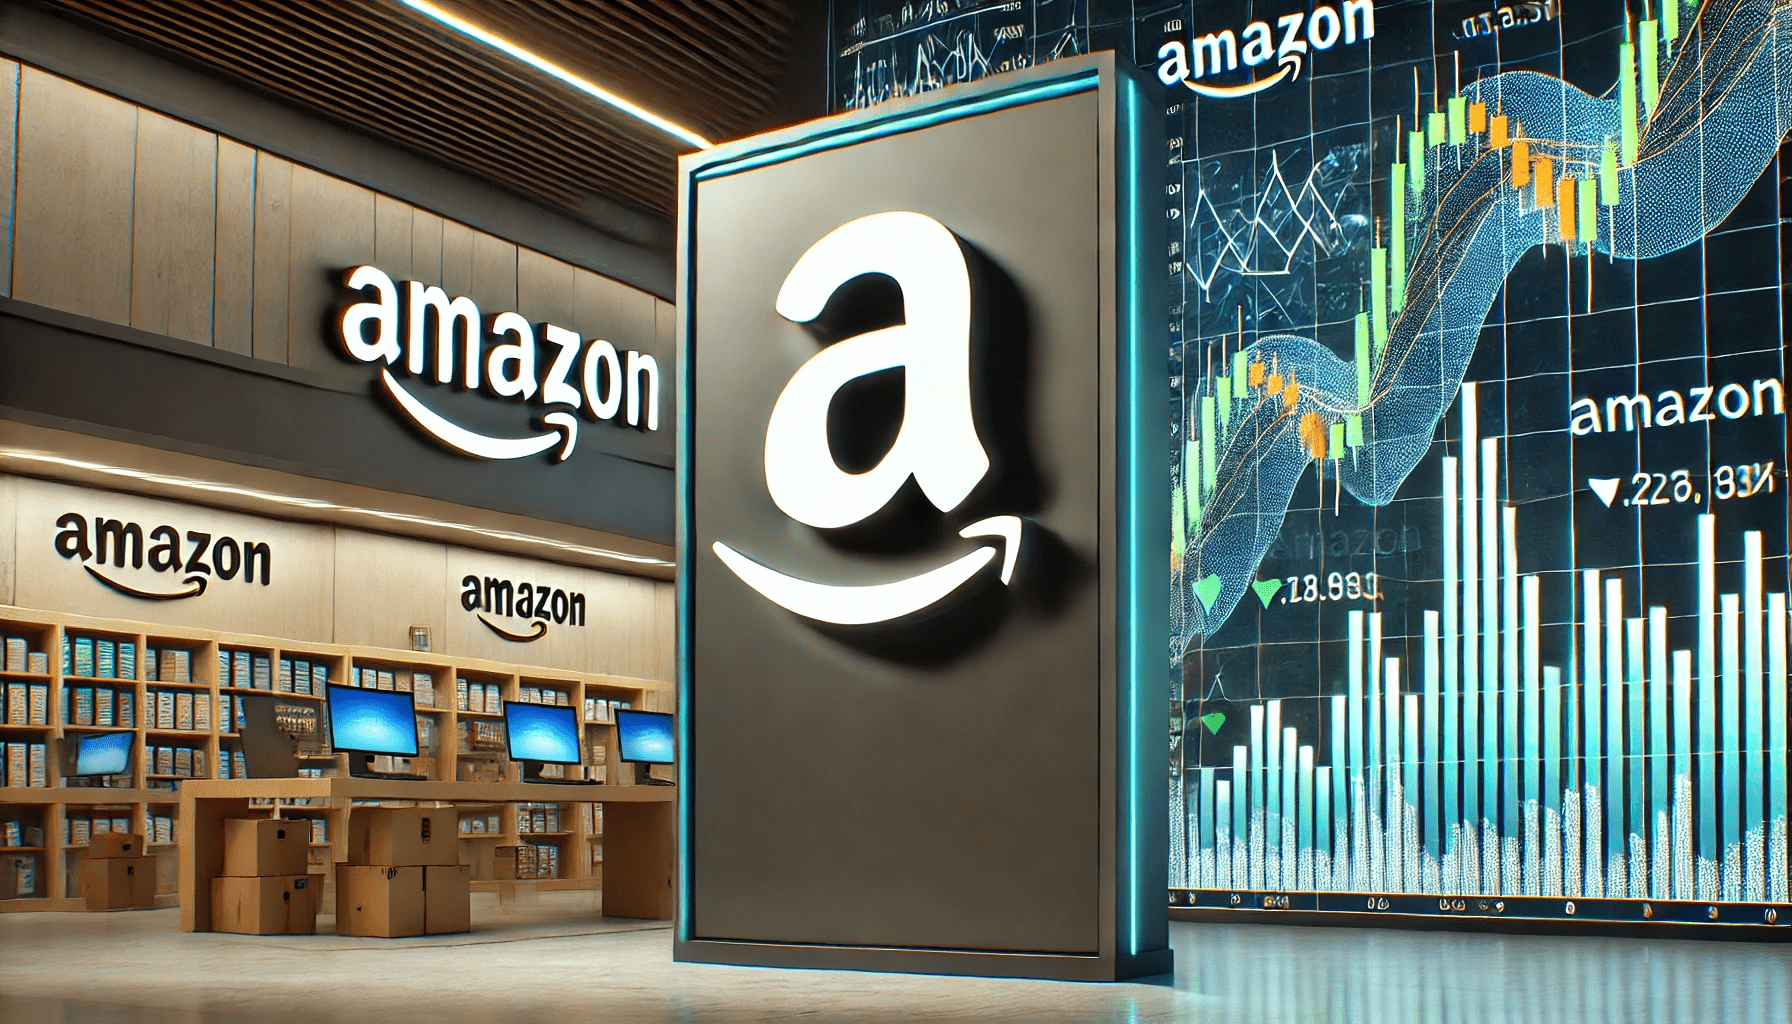

### **⛳ Stock Market Forecasting ⛳**

### **📌 Problem Statement**<a class="anchor" id="0"></a>

In the fast-paced world of financial markets, predicting stock prices is a critical task for investors and analysts alike. Among the vast array of companies listed on the stock exchange, Amazon stands out as one of the most influential, with its stock performance closely monitored by investors globally. The ability to accurately forecast Amazon’s stock price is of paramount importance, as it directly influences investment strategies, portfolio management, and risk mitigation.

However, predicting stock prices is a complex endeavor due to the inherent volatility of financial markets. Amazon's stock, like many others, is subject to fluctuations influenced by a multitude of factors, including market sentiment, economic indicators, and global events. Despite these challenges, there is a compelling interest in developing models that can effectively forecast Amazon’s stock price movements using historical data.

The available dataset provides essential information needed for such forecasting, including:

- **Date**: The specific date of each recorded stock price.
- **Open**: The price at which Amazon's stock opened at the start of the trading session.
- **High**: The highest price achieved during the trading session.
- **Low**: The lowest price recorded during the trading session.
- **Close**: The price at which the stock closed at the end of the trading session.
- **Adj Close**: The closing price adjusted for dividends, stock splits, and other corporate actions.
- **Volume**: The number of shares traded during the session.

With this data, we aim to develop predictive models that can accurately forecast Amazon’s stock price, helping investors make informed decisions.

### **📌 Roles**

The following roles are crucial in addressing the challenges of forecasting Amazon’s stock price:
- **Lead Financial Analyst**
    - Oversees the project, ensuring the accuracy and relevance of financial models.
    - PIC: `Netri Alia Rahmi`

### **📌 Goals**

The primary goal is to **develop accurate forecasting models** for Amazon’s stock price to **enhance investment decision-making** and **reduce financial risks**. Achieving this goal will support investors in optimizing their portfolios and maximizing returns.

### **📌 Objectives**

- **Data Analysis and Predictive Modeling**: Build predictive models that utilize historical price and volume data to forecast future stock prices.
- **Investment Strategy Optimization**: Provide actionable insights for investors to refine their portfolio strategies based on forecasted stock price movements.
- **Risk Management Enhancement**: Minimize financial risk by identifying potential market downturns and stock price volatility through accurate predictions.
- **Market Trend Identification**: Identify long-term and short-term trends in Amazon’s stock price, offering insights into broader market movements.

### **📌 Metrics of Success**

- **Prediction Accuracy**
    - The accuracy (RMSE) of predictive models in estimating stock prices, measured as the percentage deviation from actual prices.

- **Investment Return Improvement**
    - The percentage increase in investment returns due to the implementation of forecast-based strategies.

- **Risk Reduction**
    - The reduction in financial risk, measured through metrics such as Value at Risk (VaR) or Sharpe Ratio.

- **Market Impact Analysis**
    - Evaluation of how accurately the models capture the impact of significant market events on stock prices.

### **📌 Challenges & Opportunities**

- **Challenges**: High volatility of stock prices, limited feature set, influence of unpredictable global events, and inherent uncertainty in financial markets.
- **Opportunities**: Leveraging historical price data to create accurate predictive models, contributing to more stable and profitable portfolios, and positioning investors as leaders in data-driven market strategies.

### **📌 References**

- **Fama, E. F., & French, K. R. (1992)**. The cross-section of expected stock returns. *Journal of Finance*, 47(2), 427-465. [https://doi.org/10.1111/j.1540-6261.1992.tb04398.x](https://doi.org/10.1111/j.1540-6261.1992.tb04398.x)
  
- **Tsay, R. S. (2005)**. Analysis of financial time series. *Wiley Series in Probability and Statistics*, 2nd edition. [https://doi.org/10.1002/0471746193](https://doi.org/10.1002/0471746193)
  
- **Henrique, B. M., Sobreiro, V. A., & Kimura, H. (2019)**. Literature review: machine learning techniques applied to financial market prediction. Expert Systems with Applications, 124, 226-251. https://doi.org/10.1016/j.eswa.2019.01.012
  
- **Makridakis, S., Wheelwright, S. C., & Hyndman, R. J. (1998)**. Forecasting methods and applications. *John Wiley & Sons*. [https://doi.org/10.1002/9780470540644](https://doi.org/10.1002/9780470540644)

---

<a id="top"></a>

## **Table of Contents**

* [0. Problem Understanding](#0)
* [1. Exploratory Data Analysis](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.2 Data Understanding](#1.2)
    * [1.3 Statistical Summary](#1.3)
* [2. Data Cleansing/Preprocessing](#2)
* [3. Modelling & Evaluation](#3)
* [4. Recommendation & Suggestion](#2)

# **====== STAGE 1 ======**
# **⛳ Exploratory Data Analysis ⛳** <a class="anchor" id="1"></a>

## **🕹 Data Dictionary 🕹**<a class="anchor" id="1.1"></a>

```
🚨✨ This project analyzes a comprehensive dataset of Amazon stock prices. ✨🚨
📌 The data is collected from Yahoo Finance 📌 
```

**Amazon Stock Price Analysis**

_The objective of this analysis is to predict future stock prices based on historical data of Amazon stock._

**Dataset Description:**

The dataset contains `6,516 samples` and `7 features`. Below is the description of each feature:

**Time and Date Components**

- **`Date`** - The specific date of the recorded stock prices.

**Stock Price Metrics**

- **`Open`** - The price at which Amazon's stock opened at the start of the trading session.
- **`High`** - The highest price Amazon's stock reached during the trading session.
- **`Low`** - The lowest price Amazon's stock recorded during the trading session.
- **`Close`** - The price at which Amazon's stock closed at the end of the trading session.
- **`Adj Close`** - The closing price adjusted for dividends, stock splits, and other corporate actions.
- **`Volume`** - The number of shares of Amazon's stock traded during the session.

---

In [1]:
%%capture pip_output
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import torch

from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from copy import deepcopy

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## **📌 Import  Raw Datasets**

In [3]:
df = yf.download('AMZN', start='2010-01-01', end='2024-08-29')
df = df.reset_index()
df.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3688 non-null   datetime64[ns]
 1   Open       3688 non-null   float64       
 2   High       3688 non-null   float64       
 3   Low        3688 non-null   float64       
 4   Close      3688 non-null   float64       
 5   Adj Close  3688 non-null   float64       
 6   Volume     3688 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 201.8 KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


# **💡 Data Understanding 💡** <a class="anchor" id="1.2"></a>
## **📌 Explore Datasets**
### **Basic Datasets Information** <a class="anchor" id="1.2.1"></a>

In [6]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (3688, 7)
Number of rows : 3688
Number of columns : 7


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3688 non-null   datetime64[ns]
 1   Open       3688 non-null   float64       
 2   High       3688 non-null   float64       
 3   Low        3688 non-null   float64       
 4   Close      3688 non-null   float64       
 5   Adj Close  3688 non-null   float64       
 6   Volume     3688 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 201.8 KB


**Observations:**

- The dataset contains `6 columns` and `3,688 rows` of data.
- All columns are of type `float64`, except for `Volume`, which is of type `int64` and `Date` type `datetime64`.
- There are no missing values in the dataset.

### **Checking Duplicate Rows** <a class="anchor" id="1.2.2"></a>

In [9]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [10]:
df.duplicated().sum()

0

**Observations:** The data we have does not contain any duplicates.

### **Checking Missing Values**<a class="anchor" id="1.2.3"></a>

In [11]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: False


,Total Null Values,Percentage,Data Type
Date,0,0.000000,datetime64[ns]
Open,0,0.000000,float64
High,0,0.000000,float64
Low,0,0.000000,float64
Close,0,0.000000,float64
Adj Close,0,0.000000,float64
Volume,0,0.000000,int64


In [12]:
missing_values = ['Unknown','n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ']
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))
        df[i] = dmmy_col.replace(missing_values, np.nan)

## **📌 Statistical Summary**  <a class="anchor" id="1.3"></a>

In [13]:
numeric_stats = df.describe().fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
numeric_stats

,Date,Open,High,Low,Close,Adj Close,Volume
count,3688,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3.688000e+03
mean,2017-04-30 11:38:31.496746240,68.482840,69.265508,67.625199,68.462979,68.462979,8.427944e+07
std,-,58.573454,59.246539,57.826693,58.534921,58.534921,5.175224e+07
min,2010-01-04 00:00:00,5.296500,5.564500,5.290000,5.430500,5.430500,1.762600e+07
25%,2013-09-02 00:00:00,14.812375,14.982750,14.625375,14.828250,14.828250,5.319000e+07
50%,2017-05-01 12:00:00,47.013000,47.275000,46.369999,46.792000,46.792000,7.088600e+07
75%,2020-12-28 06:00:00,113.557503,115.885002,112.107498,113.884001,113.884001,9.925798e+07
max,2024-08-28 00:00:00,200.089996,201.199997,199.050003,200.000000,200.000000,8.484220e+08


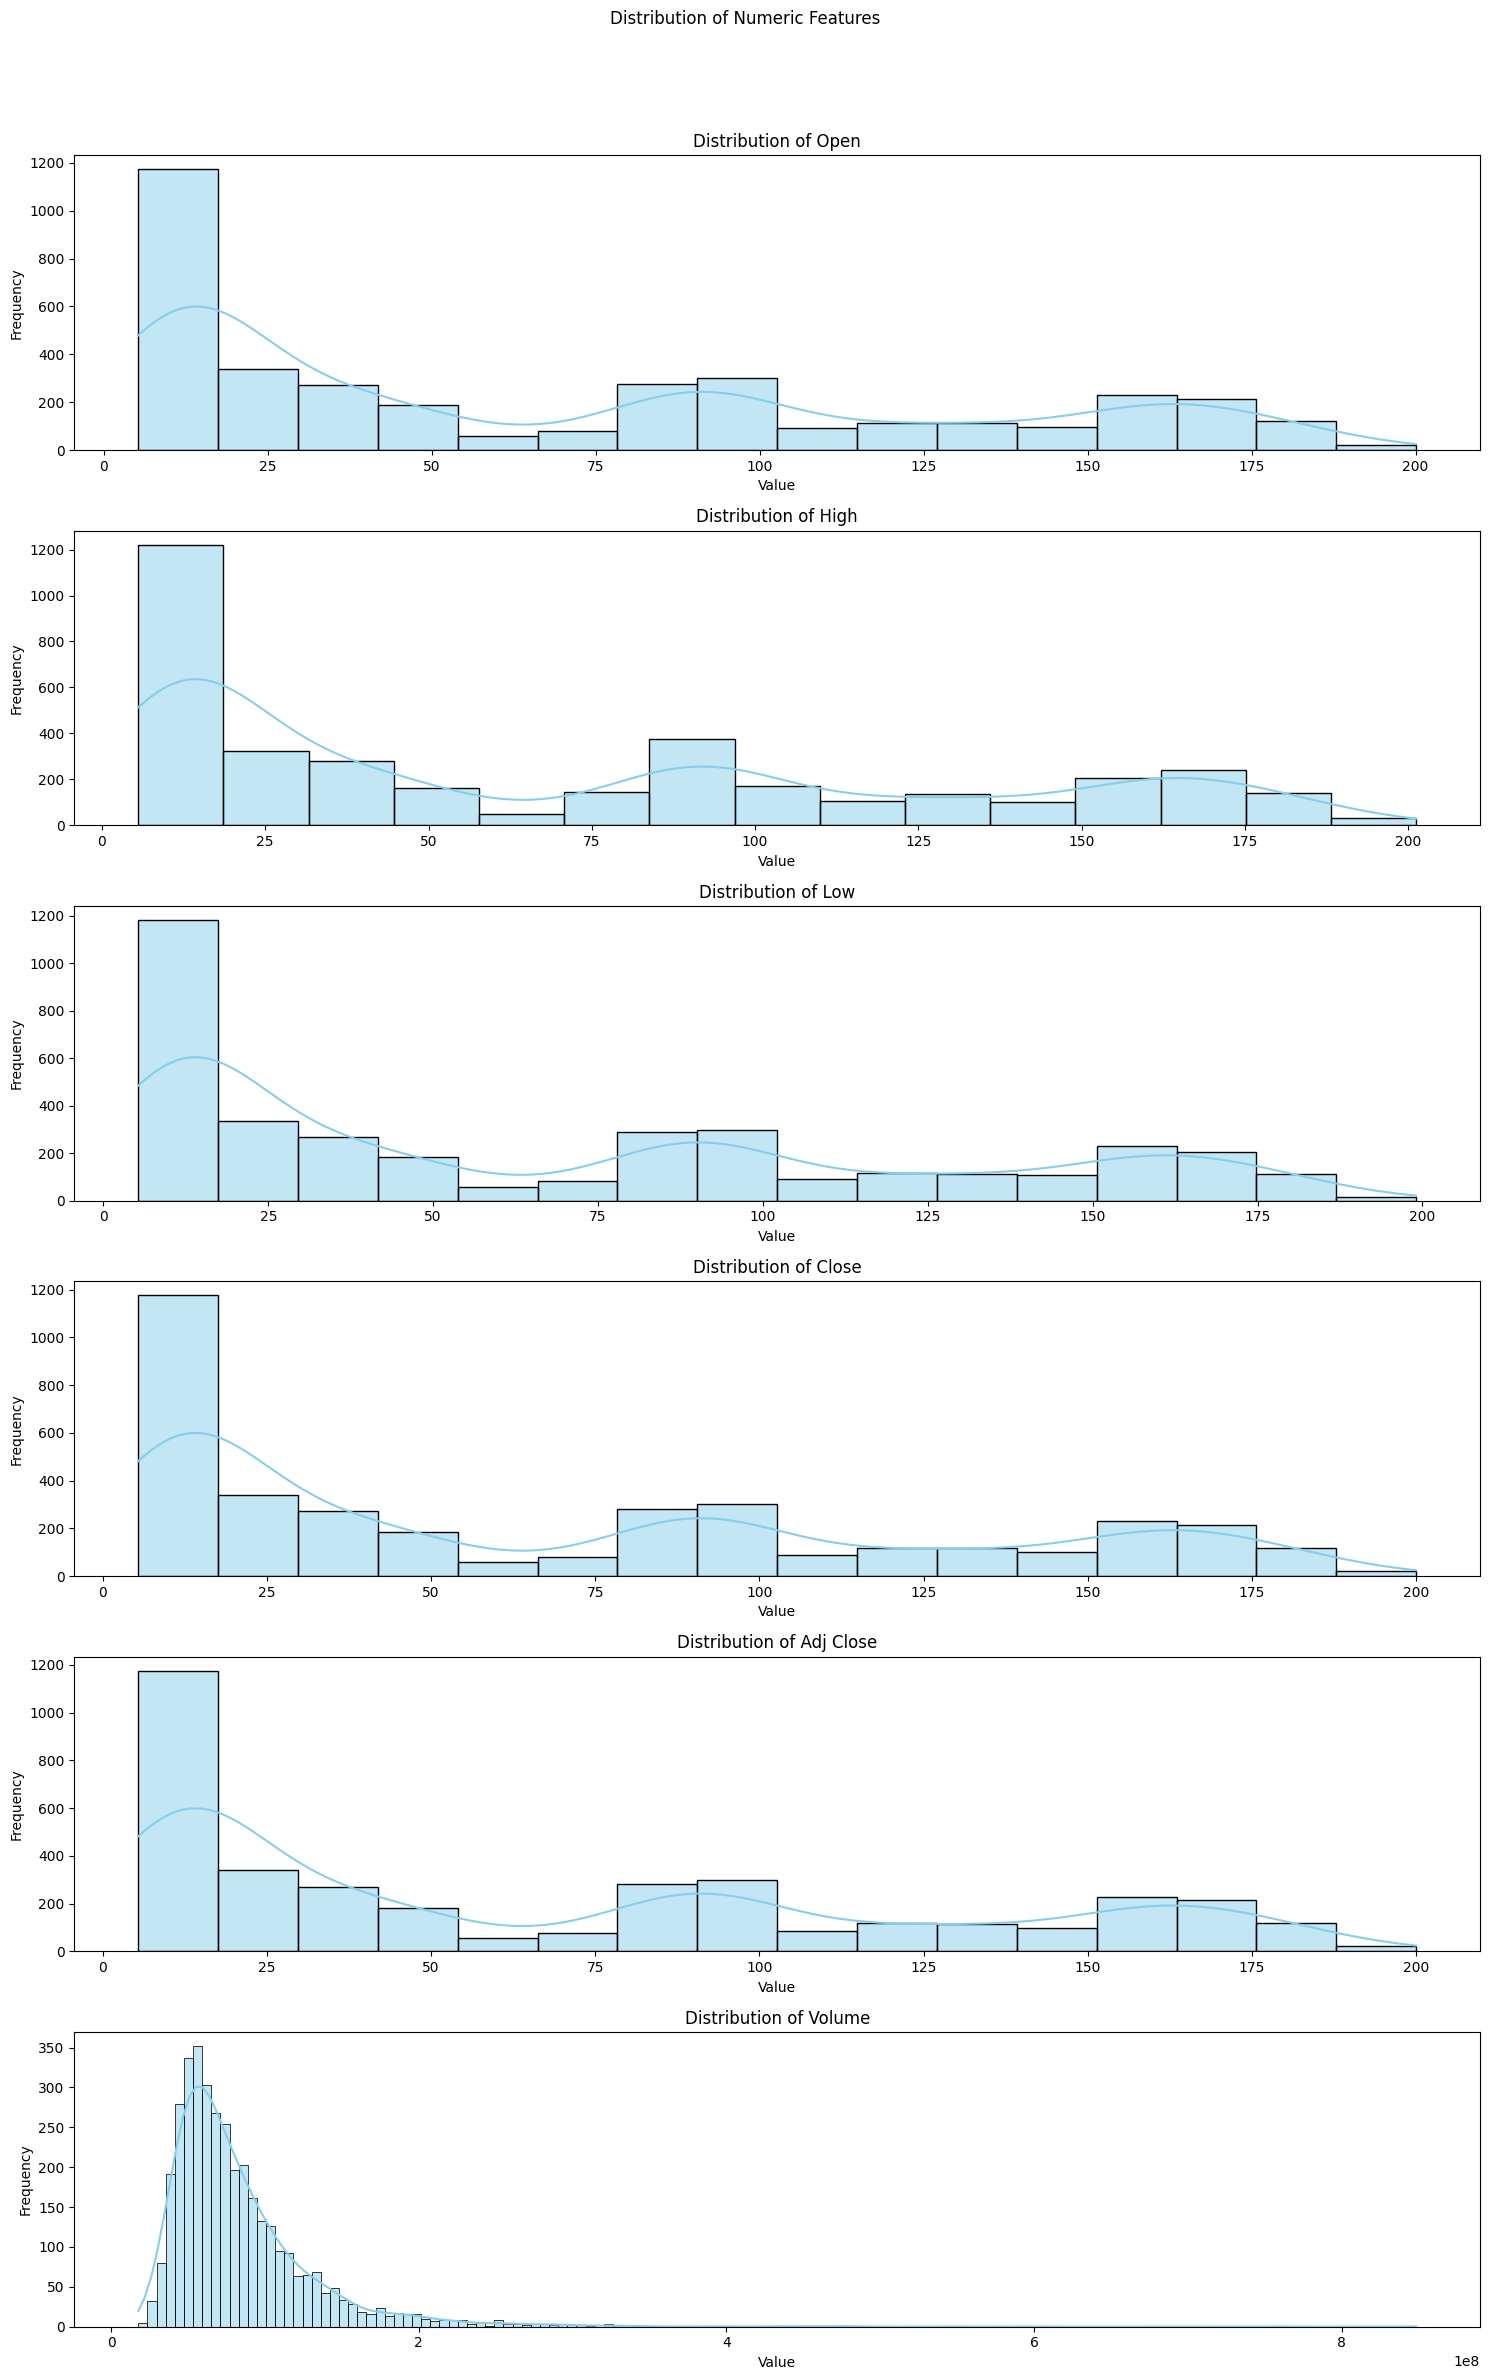

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(15, 25))
fig.suptitle('Distribution of Numeric Features')

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=ax[i], color='skyblue')
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:**
- The `Close` variable has a highly variable scale, which makes it difficult for the LSTM model to efficiently learn patterns in the data. Using the MinMaxScaler with a range of (-1, 1) helps standardize the data, ensuring all values are within the same range. This normalization process aids the LSTM model in converging faster and more accurately by preventing issues related to varying data scales, such as exploding or vanishing gradients.

<p align="right">
    <a href="#top">
        <img src="https://img.shields.io/badge/⬆%20Back%20to-Top-blueviolet?style=for-the-badge" alt="Back to Top">
    </a>
</p>

# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)` <a class="anchor" id="2"></a>

# **🏝 Data Cleansing/Preprocessing 🏝**

In [15]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2010-01-04,6.6950
1,2010-01-05,6.7345
2,2010-01-06,6.6125
3,2010-01-07,6.5000
4,2010-01-08,6.6760


The dataset has been simplified to include only the `Date` and `Close` columns, focusing on the time series aspect of stock prices. This approach highlights the importance of the closing price in forecasting models. By using just these two features, the LSTM model can effectively learn temporal patterns and dependencies within the stock price data, aiding in accurate future price predictions. The `Date` provides the sequential context, while the `Close` price is the target variable for prediction.

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [17]:
fig = go.Figure(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.update_layout(showlegend=True, title='Amazon Stock Prices', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Key trends:

1. **Long-Term Growth**: From 2010 to 2024, Amazon's stock price shows significant long-term growth, reflecting the company’s expansion and increasing market dominance.

2. **Volatility**: The plot also highlights periods of volatility, especially around 2018 and during the COVID-19 pandemic in 2020, where there were sharp fluctuations.

3. **Recent Trends**: In the post-2022 period, the stock price shows recovery and stabilization after a noticeable dip, indicating market correction and renewed investor confidence.

In [20]:
def create_shifted_features(df, lookback):
    df_copy = df.copy()
    df_copy.set_index('Date', inplace=True)
    
    for i in range(1, lookback + 1):
        df_copy[f'Close_t-{i}'] = df_copy['Close'].shift(i)
    
    df_copy.dropna(inplace=True)
    return df_copy

lookback = 7
shifted_df = create_shifted_features(df, lookback)
shifted_df.head()

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7
Date,,,,,,,,
2010-01-13,6.4555,6.3675,6.5155,6.6760,6.5000,6.6125,6.7345,6.6950
2010-01-14,6.3675,6.4555,6.3675,6.5155,6.6760,6.5000,6.6125,6.7345
2010-01-15,6.3570,6.3675,6.4555,6.3675,6.5155,6.6760,6.5000,6.6125
2010-01-19,6.3805,6.3570,6.3675,6.4555,6.3675,6.5155,6.6760,6.5000
2010-01-20,6.2890,6.3805,6.3570,6.3675,6.4555,6.3675,6.5155,6.6760


The function `create_shifted_features` is essential for preparing time series data, like stock prices, for use in models like LSTM (Long Short-Term Memory) networks. LSTM models require input data that includes sequences of past observations to predict future values. This function generates these sequences by shifting the `Close` price values by a specified lookback period, effectively creating a dataset where each row contains historical data points. This transformation allows the LSTM to learn temporal patterns and dependencies, improving its forecasting accuracy.

In [21]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[  6.45550013,   6.36749983,   6.51550007, ...,   6.61250019,
          6.73449993,   6.69500017],
       [  6.36749983,   6.45550013,   6.36749983, ...,   6.5       ,
          6.61250019,   6.73449993],
       [  6.35699987,   6.36749983,   6.45550013, ...,   6.67600012,
          6.5       ,   6.61250019],
       ...,
       [175.5       , 177.03999329, 176.13000488, ..., 178.22000122,
        177.05999756, 177.58999634],
       [173.11999512, 175.5       , 177.03999329, ..., 178.88000488,
        178.22000122, 177.05999756],
       [170.80000305, 173.11999512, 175.5       , ..., 180.11000061,
        178.88000488, 178.22000122]])

In [22]:
shifted_df_as_np.shape

(3681, 8)

## **📌 Normalization**<a class="anchor" id="1.7"></a>

### **Min-Max Scaller** <a class="anchor" id="1.3.1"></a>


Min-Max Scaler is a normalization technique used to transform features into a specific range, typically between 0 and 1. This method is crucial for data preprocessing as many machine learning algorithms perform better with normalized data. The Min-Max Scaler works by applying the formula:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \times (\text{feature_range}_{\text{max}} - \text{feature_range}_{\text{min}}) + \text{feature_range}_{\text{min}}
$$


**Where:**

- X = Original value
- X_min = Minimum value in the dataset
- X_max = Maximum value in the dataset
- feature_range_min = Desired minimum of the scaled data (e.g., -1)
- feature_range_max = Desired maximum of the scaled data (e.g., 1)


In [23]:
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)
shifted_df_as_np

array([[-0.98946392, -0.99036848, -0.98884717, ..., -0.9878501 ,
        -0.98659605, -0.98700207],
       [-0.99036848, -0.98946392, -0.99036848, ..., -0.9890065 ,
        -0.9878501 , -0.98659605],
       [-0.99047641, -0.99036848, -0.98946392, ..., -0.98719738,
        -0.9890065 , -0.9878501 ],
       ...,
       [ 0.74816197,  0.76399172,  0.75463785, ...,  0.77612114,
         0.76419734,  0.76964526],
       [ 0.72369765,  0.74816197,  0.76399172, ...,  0.78290539,
         0.77612114,  0.76419734],
       [ 0.69985021,  0.72369765,  0.74816197, ...,  0.79554864,
         0.78290539,  0.77612114]])

Min-Max Scaler, when set to scale data to a range of **-1** to **1**, helps LSTM models by normalizing features in a way that accommodates the activation functions used in neural networks, such as hyperbolic tangent (tanh), which outputs values between -1 and 1. This scaling can improve the model’s performance by aligning the feature range with the activation function's output range, thus promoting more stable and effective learning. Additionally, scaling features to -1 to 1 preserves the relative relationships between values and maintains consistency in the input data, which is essential for capturing temporal patterns in time series analysis.

In [24]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((3681, 7), (3681,))

In [25]:
X = np.copy(np.flip(X, axis=1))
X

array([[-0.98700207, -0.98659605, -0.9878501 , ..., -0.98719738,
        -0.98884717, -0.99036848],
       [-0.98659605, -0.9878501 , -0.9890065 , ..., -0.98884717,
        -0.99036848, -0.98946392],
       [-0.9878501 , -0.9890065 , -0.98719738, ..., -0.99036848,
        -0.98946392, -0.99036848],
       ...,
       [ 0.76964526,  0.76419734,  0.77612114, ...,  0.79554864,
         0.75463785,  0.76399172],
       [ 0.76419734,  0.77612114,  0.78290539, ...,  0.75463785,
         0.76399172,  0.74816197],
       [ 0.77612114,  0.78290539,  0.79554864, ...,  0.76399172,
         0.74816197,  0.72369765]])

Separating features (`X`) from target values (`y`) is essential for training machine learning models as it clearly defines the input variables and the outcomes the model is predicting. This separation enables the model to learn the relationship between the features and the target effectively. Once this separation is done, reversing the order of elements in `X` using `np.flip(X, axis=1)` ensures that the temporal sequence of the data is correctly aligned for models like LSTM. This reversal is crucial because LSTMs rely on the order of data to capture temporal dependencies accurately. Therefore, this step reorganizes the features to match the sequence required for effective learning and prediction.

In [26]:
X_train = X[:int(X.shape[0]*0.95)]
y_train = y[:int(y.shape[0]*0.95)]
X_test = X[int(X.shape[0]*0.95):]
y_test = y[int(y.shape[0]*0.95):]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3496, 7), (3496,), (185, 7), (185,))

In [27]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3496, 7, 1), (185, 7, 1), (3496, 1), (185, 1))

In [28]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

<p align="right">
    <a href="#top">
        <img src="https://img.shields.io/badge/⬆%20Back%20to-Top-blueviolet?style=for-the-badge" alt="Back to Top">
    </a>
</p>

# **====== STAGE 3 ======**<a class="anchor" id="3"></a>
`Stage 3 (ML Modelling & Evaluation)`

# **🔥 Modelling & Evaluation 🔥** <a class="anchor" id="3"></a>

In [29]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_df = TimeSeriesDataset(X_train, y_train)
test_df = TimeSeriesDataset(X_test, y_test)

In [30]:
train_loader = DataLoader(dataset=train_df, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_df, batch_size=16, shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7d92984eab60>,
 <torch.utils.data.dataloader.DataLoader at 0x7d92984ea830>)

In [31]:
for _, batch in enumerate(train_loader):
    X_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [32]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hideen_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, X):
        batch_size = X.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hideen_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hideen_size).to(device)
        out, _ = self.lstm(X, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

The LSTM model is configured to handle time series forecasting with the provided stock price data by organizing the input as sequences of closing prices over a 7-day period. Each input sequence is structured with a shape of `[batch_size, lookback, input_size]`, where `lookback` is 7, representing the past 7 days of data, and `input_size` is 1 because only the closing price is used as the feature. The LSTM layer processes these sequences with a `hidden_size` of 4, allowing the model to capture and learn patterns from the historical data effectively. This hidden size provides a balance between model complexity and learning capacity. The fully connected layer then transforms the output from the LSTM into a single prediction for the next time step. This configuration allows the model to learn temporal dependencies and make accurate forecasts based on past price trends.

<table>
  <tr>
    <td>
      <b>Input Data</b><br>
      [batch_size,<br>
      lookback,<br>
      input_size]
    </td>
    <td> 
      <b>LSTM Layer</b><br>
      [hidden_size]
    </td>
    <td>
      <b>Fully Connected Layer</b><br>
      (Linear)
    </td>
  </tr>
  <tr>
    <td colspan="3" style="text-align:center;">
      <b>Output (Prediction)</b><br>
      [batch_size, 1]
    </td>
  </tr>
</table>


In [33]:
def training():
    model.train(True)
    print('Epoch: ', epoch + 1)
    running_loss = 0.0
    
    for batch_idx, batch in enumerate(train_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(X_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 99:
            avg_loss = running_loss/100
            print('Batch: ', batch_idx+1, 'Loss: ', avg_loss)
            running_loss = 0.0
    print()

In [34]:
def validate():
    model.train(False)
    running_loss = 0.0
    
    for batch_idx, batch in enumerate(test_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            y_pred = model(X_batch)
            loss = loss_function(y_pred, y_batch)
            running_loss += loss.item()
        
    avg_loss = running_loss/len(test_loader)    
    print('Val Loss: ', round(avg_loss, 3))
    print('Val MSE: ', mean_squared_error(y_batch.cpu().numpy(), y_pred.cpu().numpy()))
    print('***************************************************')
    print()

### **Model and Configuration**

- **Epochs**: The model is trained for 10 epochs, meaning the training process iterates 10 times through the entire training dataset.
- **Loss Function**: Mean Squared Error (MSE) Loss is used to measure how well the model's predictions match the actual values. MSE Loss is a common metric for regression problems.
- **Optimizer**: The Adam optimizer is employed with a learning rate of 0.001. Adam is an optimization algorithm that adapts the learning rate during training and helps the model converge faster and more reliably.

### **Training Process**

Each epoch involves two main steps:
1. **Training**: The model parameters are updated based on the training data.
2. **Validation**: The model's performance is evaluated using validation data to gauge how well it generalizes to unseen data.

In [35]:
num_epoch = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epoch):
    training()
    validate()


Epoch:  1
Batch:  100 Loss:  0.6286653873324394
Batch:  200 Loss:  0.2748460792005062

Val Loss:  0.879
Val MSE:  0.8941627
***************************************************

Epoch:  2
Batch:  100 Loss:  0.13885419864207507
Batch:  200 Loss:  0.05075994176790118

Val Loss:  0.208
Val MSE:  0.20719689
***************************************************

Epoch:  3
Batch:  100 Loss:  0.013456592168658972
Batch:  200 Loss:  0.00918798237806186

Val Loss:  0.071
Val MSE:  0.06553363
***************************************************

Epoch:  4
Batch:  100 Loss:  0.0064491029281634835
Batch:  200 Loss:  0.00476127618807368

Val Loss:  0.036
Val MSE:  0.030367587
***************************************************

Epoch:  5
Batch:  100 Loss:  0.003799780069384724
Batch:  200 Loss:  0.003007898238720372

Val Loss:  0.026
Val MSE:  0.021336583
***************************************************

Epoch:  6
Batch:  100 Loss:  0.0025019162386888637
Batch:  200 Loss:  0.002142144184326753

Val 

### **Training Results**

- **Loss**: The loss value for specific batches during training. For example, in Epoch 1, the loss for batch 100 is 0.519, and for batch 200, it is 0.265. This value indicates how well the model is predicting on the training data.
- **Validation Loss**: The loss calculated on validation data. For instance, in Epoch 1, the validation loss is 0.957. This loss provides an indication of how well the model generalizes to data not seen during training.
- **Validation MSE**: The Mean Squared Error on validation data. This metric measures the average squared prediction errors compared to actual values on the validation set.

### **Trends from Epoch to Epoch**

- **Epoch 1-10**: The training loss and validation loss consistently decrease from epoch to epoch. For example, validation loss starts at 0.957 in Epoch 1 and decreases to 0.012 in Epoch 10. This trend indicates that the model improves in predicting values over time.
- **MSE**: Mean Squared Error also shows a significant decrease, reflecting an improvement in the model's accuracy in predicting values.

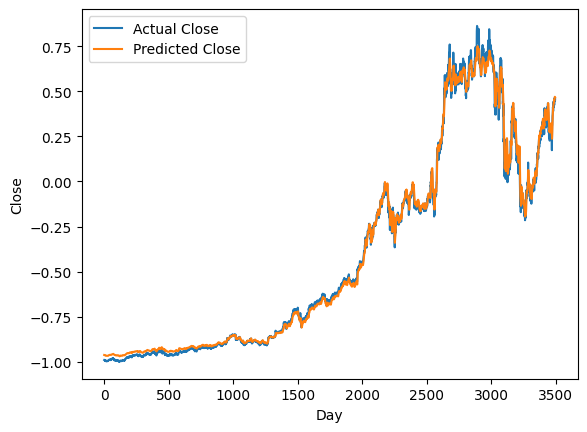

In [36]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()

In [37]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = deepcopy(dummies[:, 0])
train_predictions, train_predictions.shape

(array([  9.16971885,   9.15399299,   9.11906208, ..., 148.35619398,
        148.28823991, 148.13573613]),
 (3496,))

In [38]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = deepcopy(dummies[:, 0])
new_y_train

array([  6.45549942,   6.36749952,   6.35699821, ..., 146.32000752,
       146.08999644, 147.02999962])

In [39]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
test_predictions = scaler.inverse_transform(dummies)

test_predictions = deepcopy(test_predictions[:, 0])
test_predictions

array([148.28501298, 147.7252864 , 147.92190031, 147.36883925,
       147.68396541, 148.06814448, 147.93135786, 148.28850085,
       148.93365564, 148.97662924, 149.74638194, 151.38853747,
       152.47895692, 152.83083476, 153.49005701, 153.7701189 ,
       153.94843815, 154.00053878, 153.99838169, 153.61451865,
       152.80607464, 151.78240893, 149.93012001, 148.76651034,
       149.04516896, 149.9684692 , 151.39829075, 152.87715995,
       153.79221745, 154.04572745, 153.7532449 , 153.90765064,
       154.43962791, 154.66466087, 155.17274201, 155.76554683,
       156.42675801, 157.24448562, 158.32378911, 158.50445101,
       157.69468491, 158.0779101 , 161.27623917, 163.11851388,
       164.27717732, 165.37974489, 165.97273527, 167.34766415,
       167.75317925, 167.15865804, 167.24732478, 167.00570196,
       166.75940545, 166.0644057 , 165.84271274, 166.9608844 ,
       167.86523764, 168.49634817, 168.75227619, 168.8579271 ,
       169.63553984, 170.38993489, 170.74508895, 170.36

In [40]:
# Mengkonversi kembali nilai test target yang telah dinormalisasi ke nilai aslinya
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = deepcopy(dummies[:, 0])
new_y_test, new_y_test.shape

(array([144.83999599, 146.88000374, 144.52000478, 146.88000374,
        147.4199976 , 145.88999904, 147.47999595, 148.83999628,
        147.4199976 , 149.97000004, 154.07000628, 153.78999078,
        152.11999316, 153.8399981 , 153.41999804, 153.41000122,
        153.33999444, 153.38000494, 151.94000391, 149.92999244,
        148.47000065, 144.57000631, 145.2400053 , 149.10000654,
        151.36999347, 153.72999823, 155.17999029, 154.61999407,
        153.16000519, 151.71000733, 153.50000164, 155.33999749,
        154.78000127, 156.020002  , 156.86999315, 157.74999797,
        159.11999223, 161.25999723, 159.00000132, 155.19999554,
        159.27999943, 171.81000025, 170.30999507, 169.14999214,
        170.53000062, 169.83999348, 174.44999732, 172.33999439,
        168.63999746, 170.97999696, 169.80000038, 169.50999385,
        167.07999972, 168.58999593, 174.58000245, 174.99000568,
        174.72999543, 173.53999042, 173.16000086, 176.75999475,
        178.22000103, 177.58000122, 174.

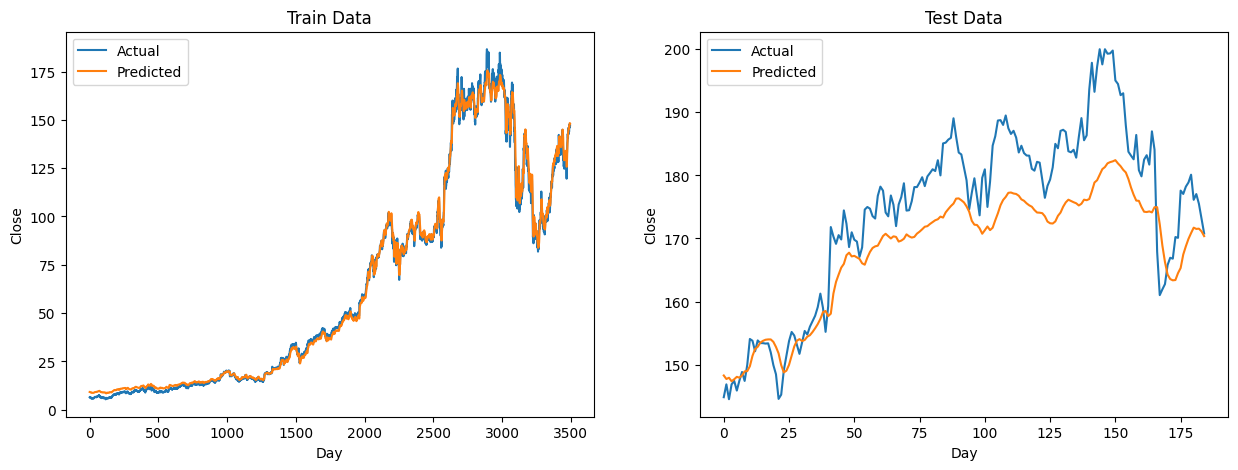

In [41]:
# Plot train dan test Actual vs Predicted
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(new_y_train, label='Actual')
ax[0].plot(train_predictions, label='Predicted')
ax[0].set_title('Train Data')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Close')
ax[0].legend()

ax[1].plot(new_y_test, label='Actual')
ax[1].plot(test_predictions, label='Predicted')
ax[1].set_title('Test Data')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Close')
ax[1].legend()

### **Observation:**

   - **Model's Ability to Capture Trends:** From the results shown in the previous graphs, the LSTM model is able to follow the general trends of stock prices, particularly in the training data. However, on the test data, the model seems less capable of responding to sharp changes or volatility that often occurs in stock prices.
   - **Smoothness of Predictions:** In the test data, the model's predictions appear "smoother" compared to the more fluctuating actual prices. This indicates that the model tends to produce more average predictions, possibly due to the lack of additional features that could help the model understand the context behind sharp price changes.
   - **Prediction Lag:** There is a possibility that the model shows some lag in adjusting its predictions to trend changes. This might be because the model only uses *close* as input, which is insufficient to capture rapid changes in price trends.

<p align="right">
    <a href="#top">
        <img src="https://img.shields.io/badge/⬆%20Back%20to-Top-blueviolet?style=for-the-badge" alt="Back to Top">
    </a>
</p>

# **====== STAGE 4 ======**<a class="anchor" id="4"></a>
`Stage 4 (Recommendation and Suggestion)`

# **🪙 Recommendation and Suggestion 🪙**

### **Recommendation:**

Here are strategic suggestions for each of the four key areas:
   - **Current Model Performance:** The LSTM model, as configured, effectively captures temporal dependencies using a 7-day lookback window with a hidden size of 4. This setup has allowed the model to learn from past price movements and produce reasonably accurate forecasts, as evidenced by the decreasing training and validation loss across epochs.

   - **Strategic Suggestion:** To enhance predictive performance, it is advisable to incorporate additional features beyond the closing price. Introducing inputs such as trading volume, technical indicators (e.g., Moving Average, RSI, MACD), and external economic data can provide the model with more context, potentially improving its ability to predict market dynamics. Furthermore, experimenting with different window sizes and hidden layer complexities can help fine-tune the model's balance between learning capacity and complexity.

   - **Current Model Insights:** The model’s predictions show that it can follow general trends, especially when used with training data. However, it appears to struggle with capturing sharp fluctuations in stock prices, leading to smoother predictions on test data.

   - **Strategic Suggestion:** Given the current model's strengths in capturing overall trends, investors could use the predictions to inform medium to long-term investment strategies. However, for short-term trading or high-frequency strategies, this model might need further refinement or supplementation with additional models that specialize in volatility or rapid market shifts. Integrating this LSTM model with other predictive tools could provide a more comprehensive strategy for portfolio management.

   - **Current Model's Risk Implications:** The smooth predictions generated by the model on test data suggest that it may underperform in volatile markets or during sudden price shifts, potentially leading to increased risk if used for decision-making in such environments.

   - **Strategic Suggestion:** To mitigate financial risks, the model should be integrated into a broader risk management framework. This could include setting up alert systems for when model predictions deviate significantly from actual prices, indicating potential model inaccuracies. Additionally, combining this model with volatility measures (e.g., VIX index, historical volatility metrics) can provide early warning signs for market downturns, helping investors adjust their positions proactively.

   - **Current Model's Trend Analysis:** The model is currently effective at identifying general upward or downward trends over a given period, which is useful for understanding market sentiment and long-term price movements.

   - **Strategic Suggestion:** To better identify and act upon market trends, consider using the LSTM model to forecast multiple time horizons (e.g., daily, weekly, monthly). This multi-timeframe analysis can provide a more granular view of both short-term and long-term trends. Additionally, incorporating market sentiment analysis—by including data from news, social media, or analyst reports—can help in identifying emerging trends before they fully materialize in the price data.

### **Potential Improvements:**

   - **Adding Additional Features:**
     - **Volume:** Integrating trading volume could provide additional information about the strength of the price trend.
     - **Technical Indicators:** Adding technical indicators such as Moving Averages, RSI, or MACD could help the model understand more complex patterns.
     - **Sentiment Analysis:** Incorporating sentiment data from news or social media could help capture the effects of market sentiment on stock prices.
   - **Window Size Selection:** Adjusting the window size to include a longer history of closing prices could provide more context to the model.
   - **Data Augmentation:** Applying data augmentation techniques such as resampling or smoothing could help the model better handle volatility.

<p align="right">
    <a href="#top">
        <img src="https://img.shields.io/badge/⬆%20Back%20to-Top-blueviolet?style=for-the-badge" alt="Back to Top">
    </a>
</p>